In [1]:
import os
import pandas as pd
import sys

root_dir = os.path.abspath(os.path.join(os.getcwd(), "../.."))
os.chdir(root_dir)

import functions

In [2]:
#Datasets
pET = pd.read_pickle(root_dir + '/results/pET_complete.pkl.gz', compression='infer')
ecoli_w3110 = pd.read_pickle(root_dir + '/results/ecoli.pkl.gz', compression='infer')

In [3]:
#Datasets
pET['Accession'] = pET['Accession'].apply(lambda x:x.split('_')[0])

In [4]:
camsol_pET21 = pd.read_csv('Testing_other_tools/camsol/CamSol_intrinsic_pET21_NESG.txt', sep='\t', header=None)
camsol_pET15 = pd.read_csv('Testing_other_tools/camsol/CamSol_intrinsic_pET15_NESG.txt', sep='\t', header=None)
camsol_ecoli = pd.read_csv('Testing_other_tools/camsol/CamSol_intrinsic_ecoli_W3110_tags.txt', sep='\t', header=None)

#merge pET
camsol_pET = pd.concat([camsol_pET15, camsol_pET21])


#Rename cols
camsol_pET = camsol_pET.rename(columns={0:'Accession', 1:'Score'})
camsol_ecoli = camsol_ecoli.rename(columns={0:'JW', 1:'Score'})

In [5]:
camsol_pET.shape, pET.shape, ecoli_w3110.shape, camsol_ecoli.shape

((16281, 2), (12216, 5), (3198, 5), (4311, 2))

In [6]:
#merge results with cleaned dataset
df_pET = pET.merge(camsol_pET, on="Accession")
df_ecoli = ecoli_w3110.merge(camsol_ecoli, on="JW")

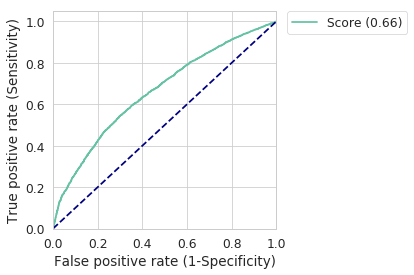

In [7]:
#ROC for pET

df = df_pET[['Score']].copy()

labels = df_pET['Solubility'].values
functions.make_roc(df, labels)

In [8]:
#Correlation for ecoli
from scipy.stats import spearmanr

spearmanr(df_ecoli['Score'], df_ecoli['Solubility(%)'])

SpearmanrResult(correlation=0.43537181844707445, pvalue=4.5274663494369577e-148)

In [9]:
df_pET.shape, df_ecoli.shape

((12216, 6), (3198, 6))

In [10]:

def compute_auc(df, labels):
    preds = df['Score'].values
    fpr, tpr, _ = functions.roc_curve(labels, preds)
    return functions.auc(fpr, tpr)


In [10]:
#Cross validation test

In [11]:
cv_10 = pd.read_pickle('results/testing_10_with_tag.pkl')
cv_40 = pd.read_pickle('results/testing_40_with_tag.pkl')
cv_90 = pd.read_pickle('results/testing_90_with_tag.pkl')


In [12]:
all_aucs_test_camsol_10 = []
for i, v in enumerate(cv_10):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(camsol_pET, on="Accession")
    temp = v.merge(camsol_pET, on="Accession")[['Score']].copy()
    labels = v.merge(camsol_pET, on="Accession")['Solubility'].values
    all_aucs_test_camsol_10.append(compute_auc(temp, labels))
all_aucs_test_camsol_10

[0.6593030349245083,
 0.6403091557669442,
 0.6862169297914757,
 0.6606277144080995,
 0.6684004565979668,
 0.658153697729808,
 0.7004325475009626,
 0.64355406642158,
 0.6684663097258408,
 0.6372563084333231]

In [13]:
functions.np.mean(all_aucs_test_camsol_10), functions.np.std(all_aucs_test_camsol_10)

(0.662272022130051, 0.01895390654368236)

In [21]:
all_aucs_test_camsol_40 = []
for i, v in enumerate(cv_40):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(camsol_pET, on="Accession")
    temp = v.merge(camsol_pET, on="Accession")[['Score']].copy()
    labels = v.merge(camsol_pET, on="Accession")['Solubility'].values
    all_aucs_test_camsol_40.append(compute_auc(temp, labels))
all_aucs_test_camsol_40

[0.6558646840409135,
 0.668298031026253,
 0.6591589155670922,
 0.6417884378552483,
 0.6558796504650466,
 0.6696522486467072,
 0.6743398330041083,
 0.6403024849648701,
 0.6663887867954159,
 0.6927981109799293]

In [22]:
functions.np.mean(all_aucs_test_camsol_40), functions.np.std(all_aucs_test_camsol_40)

(0.6624471183345584, 0.01476056051875476)

In [20]:
all_aucs_test_camsol_90 = []
for i, v in enumerate(cv_90):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(camsol_pET, on="Accession")
    temp = v.merge(camsol_pET, on="Accession")[['Score']].copy()
    labels = v.merge(camsol_pET, on="Accession")['Solubility'].values
    all_aucs_test_camsol_90.append(compute_auc(temp, labels))
all_aucs_test_camsol_90

[0.7026072363730334,
 0.641660316367793,
 0.6942530805363503,
 0.6769024818426815,
 0.6821949164666423,
 0.6233114035087719,
 0.645215577024248,
 0.6592189069859618,
 0.6782103834892523,
 0.6216864608076009]

In [23]:
functions.np.mean(all_aucs_test_camsol_90), functions.np.std(all_aucs_test_camsol_90)

(0.6625260763402334, 0.027210805647270016)